<a href="https://colab.research.google.com/github/mozey256/TGR5/blob/main/ML_Part_4_TGR5_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Novel Small Molecules as Potential TGR5/GLP1 Agonists in Type 2 Diabetes Treatment[Part 4] Regression Models with Random Forest**

Moses Ainembabazi
[*'mozey256' github*](https://github.com/mozey256/TGR5)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of tgr5 target compounds using the random forest algorithm as part 3.

---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
df = pd.read_csv('/content/06_bioactivity_data_3class_pEC50_pubchem_fp.csv')

## **3. Input features**
The ***tgr5 target*** data set contains 881 input features and 1 output variable (peC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pEC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
715,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
716,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
717,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pEC50
Y

0      6.122053
1      4.284833
2      4.593460
3      7.022276
4      6.853872
         ...   
714    6.000000
715    7.000000
716    6.301030
717    6.769551
718    5.000000
Name: pEC50, Length: 719, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(719, 230)

In [ ]:
Y.shape

(719,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(719, 230)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((575, 230), (575,))

In [ ]:
X_test.shape, Y_test.shape

((144, 230), (144,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.40170024933079873

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pEC50 Values**

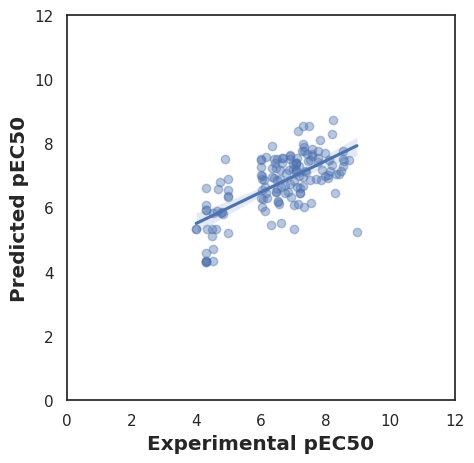

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have Y_test and Y_pred defined earlier
sns.set(color_codes=True)
sns.set_style("white")

# Create the regression plot
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})

# Set the plot labels and other attributes
ax.set_xlabel('Experimental pEC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pEC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()
